# **Network Science Homework 1**
## **Key Network Properties, Graph Models and Gephi**

### **Student:**
- Pedro Azevedo, up201905966@up.pt
- Davi Santos, up202310061@up.pt
- André Regufe, up202107760@up.pt

## **ex 1)** 

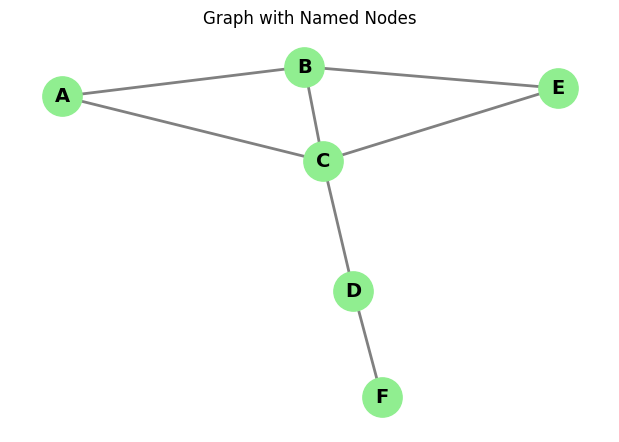

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Create graph with named nodes
G = nx.Graph()

# Add edges using named nodes
G.add_edges_from([
    ("A", "B"),
    ("A", "C"),
    ("B", "E"),
    ("B", "C"),
    ("C", "E"),
    ("C", "D"),
    ("D","F"),
])
# Draw the graph
plt.figure(figsize=(6, 4))  # Optional: control the figure size
nx.draw(
    G,
    with_labels=True,         # Show node labels
    node_color='lightgreen',  # Node color
    node_size=800,            # Node size
    font_size=14,             # Label font size
    font_weight='bold',
    edge_color='gray',
    width=2
)
plt.title("Graph with Named Nodes")
plt.show()

(a) Show the degree of each node and make a plot of its (normalized) degree distribution.

| Degree (k) | N(k) |
|------------|------|
| 1          | 1    |
| 2          | 3    |
| 3          | 1    |
| 4          | 1    |

normalized:
P(k) = N(k) / N, where N = 6

| Degree (k) | P(k)        |
|------------|-------------|
| 1          | 1 / 6 = 0.16 |
| 2          | 3 / 6 = 0.5 |
| 3          | 1 / 6 = 0.16 |
| 4          | 1 / 6 = 0.16 |

degrees frequency: Counter({2: 3, 3: 1, 4: 1, 1: 1})


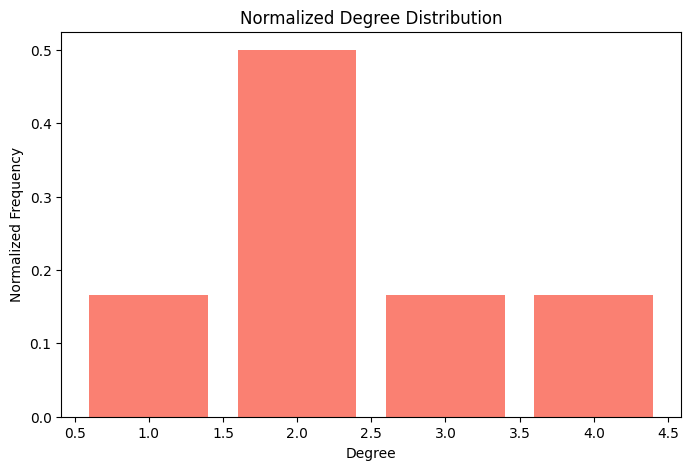

In [ ]:
from collections import Counter

# Compute degrees
degrees = [deg for node, deg in G.degree()]
degree_counts = Counter(degrees)
total_nodes = G.number_of_nodes()
normalized_distribution = {k: v / total_nodes for k, v in degree_counts.items()}

# Plot normalized degree distribution
degrees_sorted = sorted(normalized_distribution)
values_sorted = [normalized_distribution[d] for d in degrees_sorted]

print(f"degrees frequency: {degree_counts}")
plt.figure(figsize=(8, 5))
plt.bar(degrees_sorted, values_sorted, color='salmon')
plt.xlabel("Degree")
plt.ylabel("Normalized Frequency")
plt.title("Normalized Degree Distribution")
plt.grid(False)
plt.show()

 (b) Calculate the diameter and the average path length of the network
 
 A: 
 - diameter = distance BF(hB-F) = 3
 - avg path lenght
 
| Nodes | Distance |
|-------|----------|
| AB    | 1        |
| AC    | 1        |
| AE    | 2        |
| AD    | 2        |
| AF    | 3        |
| BC    | 1        |
| BE    | 1        |
| BD    | 2        |
| BF    | 3        |
| CD    | 1        |
| CE    | 1        |
| CF    | 2        |
| ED    | 2        |
| EF    | 3        |
| DF    | 1        |
|       |          |
| **Total** | (1+1+2+2+3+1+1+2+3+1+1+2+2+3+1) = 26 |
| **Total pair nodes** | 15 |
| **AvgPthLen** | 26 / 15 = **1.7333** |
 

In [74]:
diameter = nx.diameter(G)
avg_path_length = nx.average_shortest_path_length(G)
print("Diameter of the network:", diameter)
print("Average shortest path length:", avg_path_length)

Diameter of the network: 3
Average shortest path length: 1.7333333333333334


(c) Calculate the local clustering coeffcient of each node and the average local clustering coeffcient of the entire network.

| Node        | k | e | C = 2e / k(k−1)                        |
|-------------|---|---|----------------------------------------|
| A           | 2 | 1 | 2×1 / (2×(2−1)) = 1                    |
| B           | 3 | 2 | (2×2) / (3×(3−1)) = 0.6667             |
| C           | 4 | 2 | (2×2) / (4×(4−1)) = 0.3333             |
| D           | 2 | 0 | (2×0) / (2×(2−1)) = 0                  |
| **Cluster Avg** |   |   | (1 + 0.6667 + 0.3333 + 0) / 4 = 0.5 |
<!--  -->

In [75]:
# Local clustering coefficient for each node
clustering_dict = nx.clustering(G)
print("Local Clustering Coefficients:")
for node, coef in clustering_dict.items():
    print(f"{node}: {coef:.4f}")

# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"\nAverage Clustering Coefficient of the network: {avg_clustering:.4f}")

Local Clustering Coefficients:
A: 1.0000
B: 0.6667
C: 0.3333
E: 1.0000
D: 0.0000
F: 0.0000

Average Clustering Coefficient of the network: 0.5000


 (d) Calculate the (normalized) betweenness centrality and closeness centrality of each node.

| Node | Betweenness Value (Non-Normalized)               | 
|------|--------------------------------------------------|
| A    | 0                                                |
| B    | 0.5 (AE)                                         |
| C    | 0.5 (AE) + 3 (A\|B\|E–D) + 3 (A\|B\|E–F) = 6.5    |
| D    | 4 (A\|B\|C\|E–F)                                 |
| E    | 0                                                |
| F    | 0                                                |


| Node | Betweenness Value (Normalized)                        | Closeness (Normalized)                    |
|------|-------------------------------------------------------|-------------------------------------------|
| A    | 0                                                     | 1 / ((1+1+2+2+3)/5) = 0.5556              |
| B    | 0.5 / ((6−1)(6−2)/2) = 0.05                           | 1 / ((1+1+1+2+3)/5) = 0.625               |
| C    | 6.5 / ((6−1)(6−2)/2) = 0.65                           | 1 / ((1+1+1+1+2)/5) = 0.8333              |
| D    | 4 / ((6−1)(6−2)/2) = 0.4                              | 1 / ((1+1+2+2+2)/5) = 0.625               |
| E    | 0                                                     | 1 / ((1+1+2+2+3)/5) = 0.5556              |
| F    | 0                                                     | 1 / ((1+2+3+3+3)/5) = 0.4167              |


In [76]:
#Non normalized betweenness centrality
betweenness = nx.betweenness_centrality(G, normalized=False)
print("Non-Normalized Betweenness Centrality:")
for node, value in betweenness.items():
    print(f"{node}: {value:.4f}")

# Compute betweenness centrality (normalized)
betweenness = nx.betweenness_centrality(G, normalized=True)
print("Normalized Betweenness Centrality:")
for node, value in betweenness.items():
    print(f"{node}: {value:.4f}")

# Compute closeness centrality (normalized)
closeness = nx.closeness_centrality(G)
print("\nNormalized Closeness Centrality:")
for node, value in closeness.items():
    print(f"{node}: {value:.4f}")

Non-Normalized Betweenness Centrality:
A: 0.0000
B: 0.5000
C: 6.5000
E: 0.0000
D: 4.0000
F: 0.0000
Normalized Betweenness Centrality:
A: 0.0000
B: 0.0500
C: 0.6500
E: 0.0000
D: 0.4000
F: 0.0000

Normalized Closeness Centrality:
A: 0.5556
B: 0.6250
C: 0.8333
E: 0.5556
D: 0.6250
F: 0.4167


## **ex 2)** 

The transitivity gives more importance to the high degree nodes. This because the high degree nodes have a higher impact in the global occurrence of triplets, meaning higher impact in the transitivity. It is not true for average clustering coefficient, since it is calculated using the mean, giving equal weight for all the nodes.

# **Using Gephi**
For this exercise you will be asked to analyze a flight network obtained from the [openflights dataset](https://openflights.org/data.php). Start by downloading a zip file containing the network in gexf format.
http://www.dcc.fc.up.pt/˜pribeiro/aulas/ns2425/homework/flights.zip
Open the network in Gephi and use Geo Layout to visualize (you may need to install that plugin). The network is directed and corresponds to a multigraph (multiple edges between the same airports, corresponding to different airlines). When loading the network you will be asked about edge merge strategy: not merging will keep the multigraph, merging with ”sum” will create a weight attribute corresponding to the number of flights). Different questions might require different merging strategies.

## **Ex 3 )**

Answer to the following questions. For each one give a brief explanation of the steps you took. For top-k like questions you need to show the name and city of the airports and also the respective numbers (ex: number of flights or centrality value). If there are ties, show all tied answers on the k first positions. 

You might need to use various features of Gephi (appearance, layouts, filters and statistics). If needed,
you can just reload the network to have a fresh restart.


### **(a)**  **Question**: What is the number of airports and flights in the network?


    

**Answer**: 

The number of airports corresponds to the number of nodes = 3147 and the number of flights corresponds to the number of edges (not merged) = 66679

### **(b)**  **Question**: On average, an airport has how many outgoing flights? And to how many different airports?

**Answer**: 

On a merged edges dataset(sum) the mean number of outgoing flights corresponds to the Mean Weighted Outdegree = 21,188. On, average the flights goes to 11,699 airports (Mean Outdegree). 

### **(c)**  **Question**: What is the diameter and average path length of the network?


**Answer**: 

The diameter is 13 – It means that the longest shortest route between 2 airports is 13 flights – and the average path length is 3,969 – it means that we need on average ~4 flights to travel between 2 airports in the network. 


### **(d)**  **Question**: List the top-5 pairs of airports with more flights between each other.

**Answer**: 

On a merged edges dataset(sum) we can list the top 5 pairs of airports with+ more flights by sorting for Weight. We imported the dataset to python and then merged the nodes dataset (containing the name of the airports) and the edges dataset (containing the ID of the source and target airports). Then we sorted by the column “Weight” and because there were ties we have obtained 28 values: 

![imagem 1](docs/img/imag1.png)

### **(e)**  **Question**: List the top-5 of the airports that have flights to the highest number of other airports

**Answer**: 

The top 5 flights to the highest number of other airports should be checked on the value of Unweighted Out-degree: 


![image 2](./docs/img/imag2.png)

### **(f)**  **Question**: List the top-5 of the airports with highest normalized betweenness centrality.


**Answer**: 

The top 5 flights with highest normalized betweenness centrality are: 

These are big airports that often act like “bridges” on other flights. 

![image 2](./docs/img/imag3.png)

### **(g)**  **Question**: Consider Ted Stevens Anchorage International Airport. What is its global ranking in terms of betweenness centrality and out-degree? Can you explain the discrepancy? Indicate two other airports with the same kind of behavior (high betweenness centrality but relatively low out-degree).


**Answer**: 

Ted Stevens Anchorage International Airport is ranked 5th in the top airports by betweenness centrality, but 280th in the out-degree ranking. This indicates that the airport has relatively few departing flights yet plays an important role in the global network. It is likely situated along major flight paths that connect multiple regions, serving as a key transit or connecting hub. In this same situation is “Guarulhos - Governador André Franco Montoro International Airport” and “Sydney Kingsford Smith International Airport”

![image 2](./docs/img/imag4.png)

### **(h)**  **Question**: List the top-5 of countries with the highest number of airports

**Answer**: 

The top 5 countries with more airports are United States, Canada, China, Brazil and Australia. 

![image 5](./docs/img/imag5.png)

### **(i)**  **Question**: List the top-5 of airlines with the highest number of flights. [(info about airline codes)](https://openflights.org/data.php#airline)

**Answer**: 

The top 5 airlines with the highest number of flights are: 

![image 6](./docs/img/imag6.png)

To observe these values, we didn’t merge the edges when importing the file to Gephi.  

### **(j)**  **Question**: What is the number of domestic flights inside China?

In [ ]:
# Code and output copyed from the src/rede.ipymb 

# Get list of IATA codes for Chinese airports
china_airports = set(df_nodes_china['iata'])

# Filter edges where both source and destination are in China
china_domestic_flights = df_edges[
    (df_edges['s'].isin(china_airports)) &
    (df_edges['d'].isin(china_airports))
]

len(china_domestic_flights)

6851

**Answer**: 

 For getting the number of domestic flights inside China we analyze the data without merging edges. Then, with a dataset with the nodes (airports) of China, we were able to merge to the edge’s dataset only if the source column “s” and the destination column “d” correspond to the IATA code of a airport in China. We find 6851 domestic flights. Here’s the code we use: 

### **(K)**  **Question**: How many airports in USA ﬂy to at least 50 other airports in the global network?

**Answer**: 

To check this, we used the merged edges dataset with only the USA country and we filtered the outdegree column (=> 50). We found 32 airports in USA that fly to at least 50 airports in the network. 


In [ ]:
# Code and output copyed from the src/rede.ipymb 

len(df_nodes_merged_USA.loc[df_nodes_merged_USA["outdegree"] >= 50])

32

### **(L)**  **Question**:  How many flights are there between Portugal and Brazil?

**Answer**: 

For getting the number of flights between Portugal and Brazil we analyzed the nodes and edges dataset not merged. The first step was to filter flights that departure from Portugal to Brazil and then the opposite. We did this in a similar way that we did with China in the question J). We found 24 values. 

In [ ]:
# Code and output copyed from the src/rede.ipymb 

df_nodes_portugal = df_nodes.loc[df_nodes["country"] == "Portugal"]
df_nodes_brazil = df_nodes.loc[df_nodes["country"] == "Brazil"]

portugal_airports = set(df_nodes_portugal['iata'])
brazil_airports = set(df_nodes_brazil['iata'])

PTtoBR_flights = df_edges[
    (df_edges['s'].isin(portugal_airports)) &
    (df_edges['d'].isin(brazil_airports))
]

BRtoPT_flights = df_edges[
    (df_edges['s'].isin(brazil_airports)) &
    (df_edges['d'].isin(portugal_airports))
]

print(len(PTtoBR_flights)+len(BRtoPT_flights))

24


### **(M)**  **Question**: Consider a network formed only by Ryanair flights. What is the number of nodes and edges of its giant component? Considering only this giant component, what is the most important airport in terms of closeness centrality?

**Answer**: 


### **(n)**  **Question**: How many airport are reachable from Francisco de S´a Carneiro Porto Airport in 1 flight? And in at most 2 flights? And in at most 3 flights?

**Answer**: 

To determine how many airports are reachable from airport Francisco de Sá Carneiro Porto Airport, we applied the Ego Network Filter in the Filter menu >Topology > Ego Network and selected the node ID = 1636. Then, we applied different depth levels (1,2 and 3) and counted the resulting nodes. 

In 1 flight we can reach 62 airports (about 1.97% of the network), in 2 flights we can reach 756 airports (24.02%) and within 3 flights we can reach 2377 nodes (75.53% of the network). 

### **(o)**  **Question**: Create an image showing the flight network between american and canadian aiports with more than 100 destinations in the global network. The size of the nodes should reflect the global betweenness centrality, and their colors should be different for each time zone. Nodes should be labeled with the city name. Try to make your image as comprehensible and aesthetically pleasing as possible.


**Answer**: 


# **Erdos-Renyi Model**

## **Ex 4)**

**Question**:

Write code for generating a random network following the G(n,p) Erdos-Renyi model, that is,
a network with n nodes, where each pair of nodes has probability p of being connected.
Include as attached files, two random networks random1.txt and random2.txt generated respectively
with n = 2000, p = 0.0001 and n = 2000, p = 0.005 (in the described format).

**Answer**: 
We can solve this exercise in two ways:
- 1st by creating our own code, in this case it was created in the file "random_network.py"

In [52]:
from src.random_erdos_renyi_network import generate_erdos_renyi

# Generate a Network Erdos Renyi and save
graph1 = generate_erdos_renyi(n=2000, p=0.0001, filename="data/random1.txt")
graph2 = generate_erdos_renyi(n=2000, p=0.005, filename="data/random2.txt")

File data/random1.txt already exists.
File data/random2.txt already exists.


- 2nd we can also create a random network following Erdos-Renyi Model using the [networkx](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#rf62e773f8347-2) library which contains a specific function for this purpose 

ps. Networkx recommends using another function that is not as complex. [fast_gnp_random_graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph)

In [53]:
import networkx as nx
from src.load_save_network import save_network_nx

graph1 = nx.erdos_renyi_graph(n=2000, p=0.0001)
graph2 = nx.erdos_renyi_graph(n=2000, p=0.005)

# Save the graphs to files
save_network_nx(graph1, "data/random1.txt")
save_network_nx(graph2, "data/random2.txt")

File data/random1.txt already exists.
File data/random2.txt already exists.


## **ex 5)** 

**Question**:

Write code for computing the size of the giant component of a given network.
Use it to compute the size of giant component of the two random networks you generated (random1.txt
and random2.txt), and show the obtained results.
Hint: you can use any graph method traversal to compute the giant component, such as breadth-first
search (BFS) or depth-first search (DFS). Take care to implement an O(n) algorithm that only passes
trough each node once.


**Answer**: 

We try to solve this exercise in 3 different ways, there was a problem all give different values:

after loading graph

- 1st attempt creating our own code following the description on slide 10 of [Measuring Networks and
Random Graph Models](https://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/2_graphmodels.pdf)

In [54]:
from src.load_save_network import load_network_advanced

graph1 = load_network_advanced("data/random1.txt", undirected_graph=False)
graph2 = load_network_advanced("data/random2.txt", undirected_graph=False)

In [55]:
from src.giant_component import giant_component_size

giant3 = giant_component_size(graph1)
giant4 = giant_component_size(graph2)

print("giant component size of random1 using model described in the slides =", giant3)
print("giant component size of random2 using model described in the slides =", giant4)

giant component size of random1 using model described in the slides = 5
giant component size of random2 using model described in the slides = 915


- 2nd attempt creating our own code for a more efficient code by eliminating already visited clusters so that we don't need to do a search if a node has been visited.

In [56]:
from src.giant_component import giant_component_size_TryRemove

# Find the giant component of the first graph
giant1 = giant_component_size_TryRemove(graph1)
# Find the giant component of the second graph
giant2 = giant_component_size_TryRemove(graph2)
print("giant component size of random1 using TryRemove =", giant1)
print("giant component size of random2 using TryRemove =", giant2)

giant component size of random1 using TryRemove = 5
giant component size of random2 using TryRemove = 18511


- The 3rd attempt was made after analyzing the results of the previous attempts in the hope of confirming the results. We used the networkx library to find the size of the giant component, but the result goes against previous results

In [58]:
import networkx as nx
import os

def load_network(filename):
    """Loads a network from a file into a NetworkX graph."""
    if not os.path.exists(filename):
        raise FileNotFoundError(f"File {filename} not found.")

    graph = nx.Graph()
    with open(filename, 'r') as f:
        for line in f:
            u, v = map(int, line.strip().split())
            graph.add_edge(u, v)
    return graph

G1 = load_network("data/random1.txt")
G2 = load_network("data/random2.txt")

# Find the largest connected component
giant_component_1 = max(nx.connected_components(G1), key=len)
giant_component_2 = max(nx.connected_components(G2), key=len)

# Create subgraphs from the largest components
giant_nx_1 = G1.subgraph(giant_component_1)
giant_nx_2 = G2.subgraph(giant_component_2)

print("Giant component size of random1 using NetworkX =", len(giant_nx_1))
print("Giant component size of random2 using NetworkX =", len(giant_nx_2))

Giant component size of random1 using NetworkX = 5
Giant component size of random2 using NetworkX = 2000


## **ex 6)**

**Question**:

The following is an exercise to study the emergence of a giant component.
Combining your previous code, generate a series of random networks with n = 2000 and p varying
from 0.0001 to 0.005 (with steps of 0.0001).

Show a plot of your results, with the X axis representing p and the Y axis representing the size of the
giant component.

Was the plot what you were expecting? What is the shape of it? At what average degree values do
you notice something happening?

**Answer**: 

We were expecting to get a plot, which has the characteristics of growing quickly and flattening out when it reaches the maximum number of nodes 2000, as we can see in the slide 42 [2_graphmodels.pdf](https://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/2_graphmodels.pdf)

In [59]:
import numpy as np
from src.random_erdos_renyi_network import generate_erdos_renyi
from src.load_save_network import load_network_advanced
import matplotlib.pyplot as plt

def plot_giant_component(p_start, p_stop, p_step, n, filename, giant_component_func):
    p_array_values = np.arange(p_start, p_stop, p_step)
    #print(f"p_array_values = {p_array_values}")
    
    giant_sizes_array = []
    for p in p_array_values:
        #print(f"p = {p:4f}")
        graph = generate_erdos_renyi(n=n, p=p, filename=filename, file_remove=True)
        graph = load_network_advanced(filename)
        giant_size = giant_component_func(graph)
        giant_sizes_array.append(giant_size)
        #print(f"Giant component size for p={p:4f}: {giant_size}")
    
    # Plot results
    plt.figure(figsize=(8,6))
    plt.plot(p_array_values, giant_sizes_array, marker='o', linestyle='-', color='b')
    plt.xlabel("p")
    plt.ylabel(" the size of the giant component")
    plt.title("A plot the results of Giant Component in an Erdős-Rényi Network")
    plt.grid()
    plt.show()



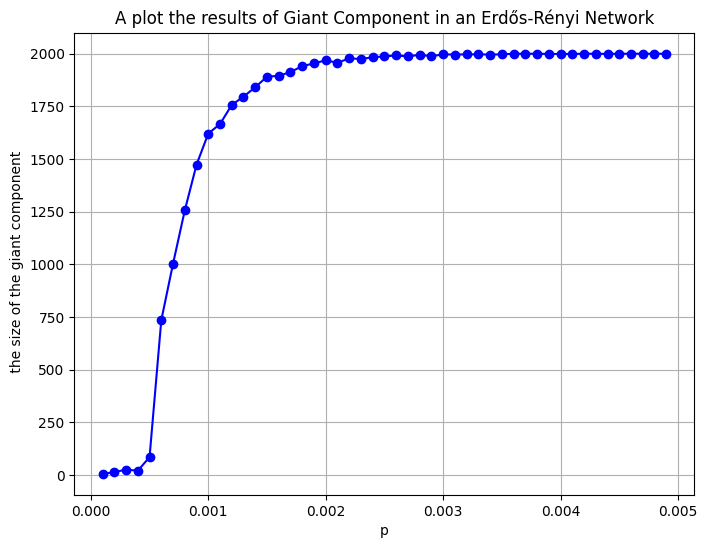

In [60]:
from src.giant_component import giant_component_size

p_start = 0.0001
p_stop = 0.005
p_step = 0.0001
n = 2000

plot_giant_component(p_start, p_stop, p_step, n, "data/random.txt", giant_component_size)


# **Barabasi-Albert Model**

## **ex 7)**

**Question**:

Write code for generating a random network following the $BAn,m0,m$ [Barab´asi-Albert model](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model).

This model uses a preferential attachment mechanism and it works in the following way ([some hints](https://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/bamodel.pdf)):

- You begin with a fully connected network containing m0 nodes
- In each iteration (until you reach a total $n$ nodes) you add one new node connected to m existing nodes, with a probability proportional to the number of already existing connections of previous nodes. Formally, the probability $p_i$ that the new node is connected to node $i$ is:

$$
p_i =\frac{k_i} {\sum_{j} k_i }
$$

$k_i$ is the degree of node i and the sum is made over the degrees of all existing nodes.

Include as attached files, two barab´asi-albert networks ba1.txt and ba2.txt generated respectively
with $n = 2000$, $m0 = 3$, $m = 1$ and $n = 2000$, $m0 = 5$, $m = 2$ (in the described format).

**Answer**:

it was created a file barabasi_albert where we can generate a Barabasi-Albert Model

In [ ]:
from src.load_save_network import save_graph_network
from src.barabasi_albert import generate_barabasi_albert

save_graph_network(generate_barabasi_albert(n = 2000, m0=3, m=1, random_seed=42), "data/ba1.txt")
save_graph_network(generate_barabasi_albert(n = 2000, m0=5, m=2, random_seed=42), "data/ba2.txt")

## **ex 8)**

**Question**:

The previous process should generate a scale-free network with a power law degree distribution with
exponent $α = 3$.

**Plot the degree distribution** of both your generated networks using **cumulative binning** ([see
slides 102 and 103](https://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/2_graphmodels.pdf)) and try to fit with the corresponding power law function (showing it in the plot).

**Answer**: 

To create a graph of the above networks, we first create a cumulative distribution ( cdf ) following the formula
$$
    cdf = [ \frac{n} {n}, \frac{n-1} {n}, \frac{n-2} {n}, ... , \frac{1} {n}]
$$

then we create a power law function following the syllables description, finally we use the curve fitting function to obtain the parameters.

With the parameters for the power law and the cdf values ​​of the node degrees we can create the following graphs.

In [62]:
def cumulative_distribution(a):
    """Compute the cumulative distribution function (CDF) of a."""
    sorted_a = np.sort(a)[::-1]
    cdf = np.arange(1, len(a) + 1) / len(a)   # [1, n-1/n , n-2/n, ... , 1/n], n = len(degrees)
    return sorted_a, cdf

# Power-law 
def power_law(x, a, c):
    """Power law function for fitting."""
    return (c/1-a)  * x ** (-(a-1))

In [63]:
from src.load_save_network import load_network_advanced
import numpy as np
import matplotlib.pyplot as plt
import collections
import scipy.optimize
import os

# Load the Barabási-Albert graphs
graph1 = load_network_advanced("data/ba1.txt")
graph2 = load_network_advanced("data/ba2.txt")

# Compute degrees of each node
degrees1 = [len(graph1[node]) for node in graph1]
np.array(degrees1)
degrees2 = [len(graph2[node]) for node in graph2]
np.array(degrees2)

# Compute cumulative distributions
sorted_degrees1, cdf1 = cumulative_distribution(degrees1)
sorted_degrees2, cdf2 = cumulative_distribution(degrees2)

# Fit power law
params1, _ = scipy.optimize.curve_fit(power_law, sorted_degrees1, cdf1)
params2, _ = scipy.optimize.curve_fit(power_law, sorted_degrees2, cdf2)


In [64]:
def plot_cdf(sorted_degrees, cdf, params, title):
    """Plot the cumulative distribution function (CDF) with fitted power law."""
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_degrees, cdf, 'o', label='CDF')
    plt.plot(sorted_degrees, power_law(sorted_degrees, *params), 'r-', label='Fitted Power Law fit: a=%5.3f, c=%5.3f' % tuple(params))
    plt.xlabel('Degree (scale)')
    plt.ylabel('Cumulative Probability (scale)')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_cdf_log(sorted_degrees, cdf, params, title):
    """Plot the cumulative distribution function (CDF) with fitted power law."""
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_degrees, cdf, 'o', label='CDF')
    plt.plot(sorted_degrees, power_law(sorted_degrees, *params), 'r-', label='Fitted Power Law: a=%5.3f, c=%5.3f' % tuple(params))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Cumulative Probability (log scale)')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

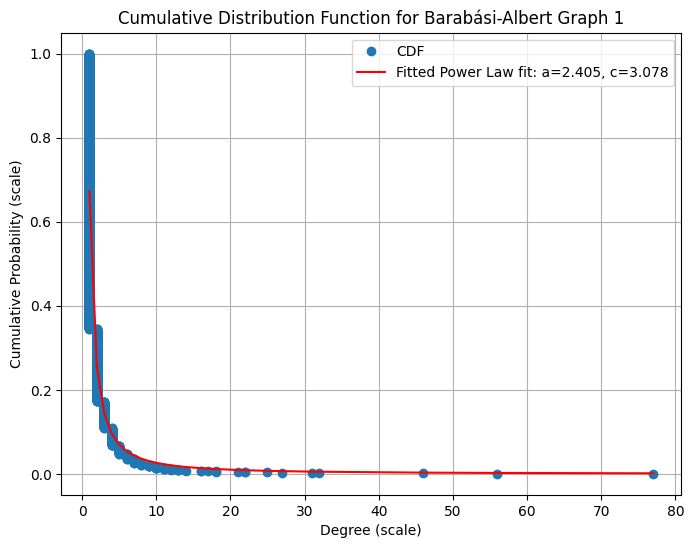

In [65]:
plot_cdf(sorted_degrees1, cdf1, params1, "Cumulative Distribution Function for Barabási-Albert Graph 1")

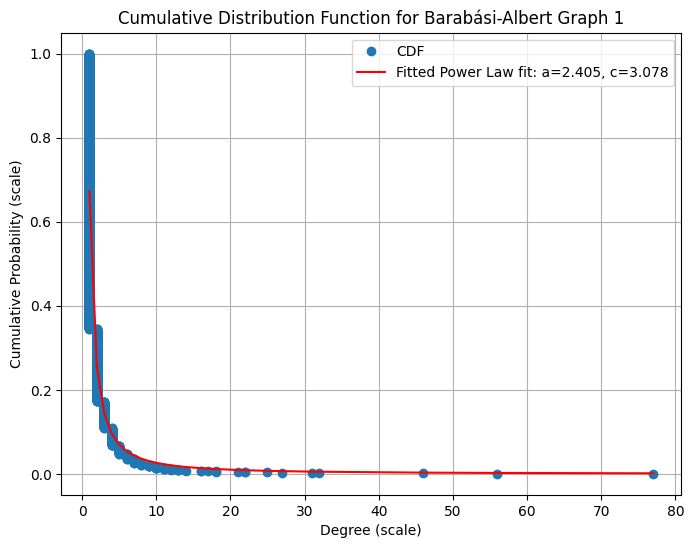

In [66]:
plot_cdf(sorted_degrees1, cdf1, params1, "Cumulative Distribution Function for Barabási-Albert Graph 1")

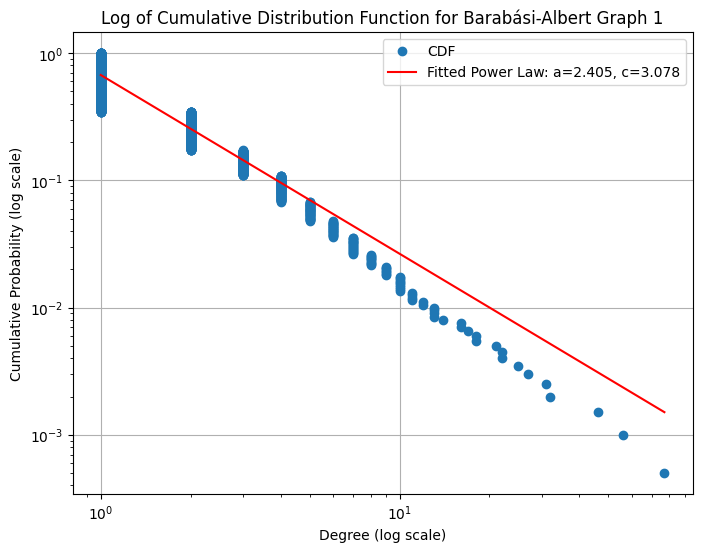

In [67]:
plot_cdf_log(sorted_degrees1, cdf1, params1, "Log of Cumulative Distribution Function for Barabási-Albert Graph 1")

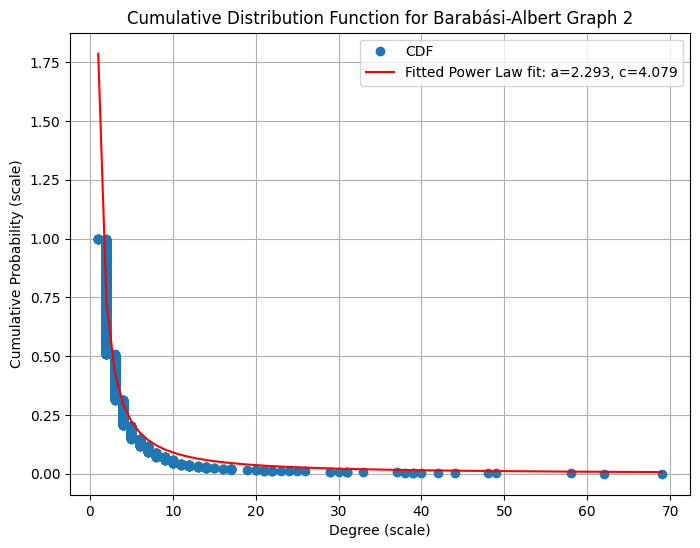

In [68]:
plot_cdf(sorted_degrees2, cdf2, params2, "Cumulative Distribution Function for Barabási-Albert Graph 2")

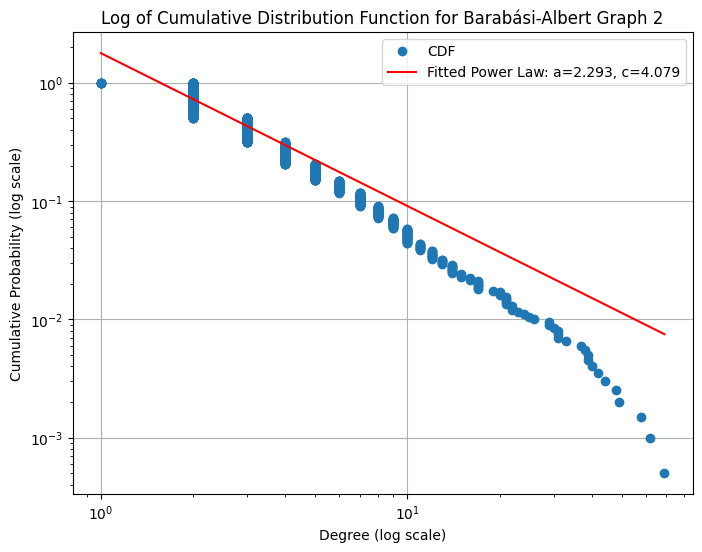

In [69]:
plot_cdf_log(sorted_degrees2, cdf2, params2, "Log of Cumulative Distribution Function for Barabási-Albert Graph 2")

- Experimenting the powerlaw implementation from 'powerlaw' lib, using the same empirical data we could find a different alfa (~ 3.2). Please check the plots below.

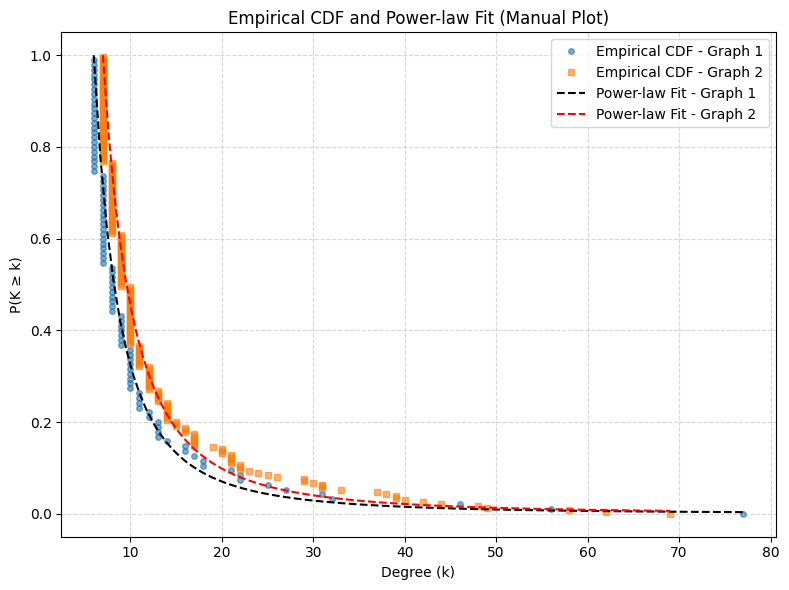

Graph 1: alpha = 3.2035, xmin = 6.0
Graph 2: alpha = 3.2065, xmin = 7.0


In [70]:
import powerlaw

# Fit using powerlaw
fit1 = powerlaw.Fit(degrees1, verbose=False)
fit2 = powerlaw.Fit(degrees2, verbose=False)

# Extract empirical CDFs
sorted_degrees1 = np.sort(fit1.data)
cdf1 = np.arange(1, len(sorted_degrees1)+1) / len(sorted_degrees1)

sorted_degrees2 = np.sort(fit2.data)
cdf2 = np.arange(1, len(sorted_degrees2)+1) / len(sorted_degrees2)

# Generate theoretical power-law CDFs from xmin onward
x1 = np.linspace(fit1.xmin, max(sorted_degrees1), 100)
pl_cdf1 = 1 - fit1.power_law.cdf(x1)

x2 = np.linspace(fit2.xmin, max(sorted_degrees2), 100)
pl_cdf2 = 1 - fit2.power_law.cdf(x2)

# Plotting with matplotlib
plt.figure(figsize=(8, 6))

# Empirical CDFs
plt.plot(sorted_degrees1, 1 - cdf1, 'o', markersize=4, alpha=0.6, label="Empirical CDF - Graph 1")
plt.plot(sorted_degrees2, 1 - cdf2, 's', markersize=4, alpha=0.6, label="Empirical CDF - Graph 2")

# Fitted power-law CDFs
plt.plot(x1, pl_cdf1, 'k--', label="Power-law Fit - Graph 1")
plt.plot(x2, pl_cdf2, 'r--', label="Power-law Fit - Graph 2")

plt.xlabel("Degree (k)")
plt.ylabel("P(K ≥ k)")
plt.title("Empirical CDF and Power-law Fit (Manual Plot)")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print power-law parameters
print("Graph 1: alpha = {:.4f}, xmin = {}".format(fit1.alpha, fit1.xmin))
print("Graph 2: alpha = {:.4f}, xmin = {}".format(fit2.alpha, fit2.xmin))


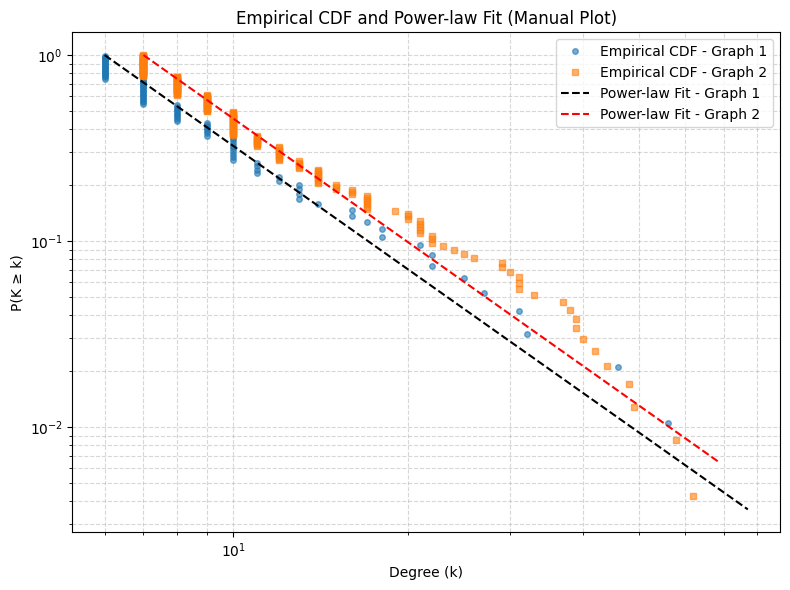

Graph 1: alpha = 3.2035, xmin = 6.0
Graph 2: alpha = 3.2065, xmin = 7.0


In [71]:
# Plotting with matplotlib
plt.figure(figsize=(8, 6))

# Empirical CDFs
plt.loglog(sorted_degrees1, 1 - cdf1, 'o', markersize=4, alpha=0.6, label="Empirical CDF - Graph 1")
plt.loglog(sorted_degrees2, 1 - cdf2, 's', markersize=4, alpha=0.6, label="Empirical CDF - Graph 2")

# Fitted power-law CDFs
plt.loglog(x1, pl_cdf1, 'k--', label="Power-law Fit - Graph 1")
plt.loglog(x2, pl_cdf2, 'r--', label="Power-law Fit - Graph 2")

plt.xlabel("Degree (k)")
plt.ylabel("P(K ≥ k)")
plt.title("Empirical CDF and Power-law Fit (Manual Plot)")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print power-law parameters
print("Graph 1: alpha = {:.4f}, xmin = {}".format(fit1.alpha, fit1.xmin))
print("Graph 2: alpha = {:.4f}, xmin = {}".format(fit2.alpha, fit2.xmin))
